## Naive Baye's Implementation

In [1]:
# import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### load dataset

In [2]:
data = pd.read_csv("seeds_dataset.csv") # Reading the Data

In [3]:
data.head() # display top 5 observation

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
data.tail() # display last 5 observation

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
198,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


### About dataset

The Wheat Seeds Dataset involves the prediction of species given measurements of seeds from different varieties of wheat.

It is a multiclass (3-class) classification problem. The number of observations for each class is balanced. There are 210 observations with 7 input variables and 1 output variable. The variable names are as follows:

    Area
    
    Perimeter
    
    Compactness
    
    Length of kernel
    
    Width of kernel
    
    Asymmetry coefficient
    
    Length of kernel groove
    
    Class (1, 2, 3).

### Statistical Information 

In [5]:
data.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


### Data Profiling

##### Note :

Students need to perform data Profiling part of given dataset itself in which he/she show :-
    
    a) The number of rows
    
    b) The number of columns
    
    c) Number of missing values per column and their percentage
    
    d) Number of duplicate rows

    e) datatypes of columns

### EDA

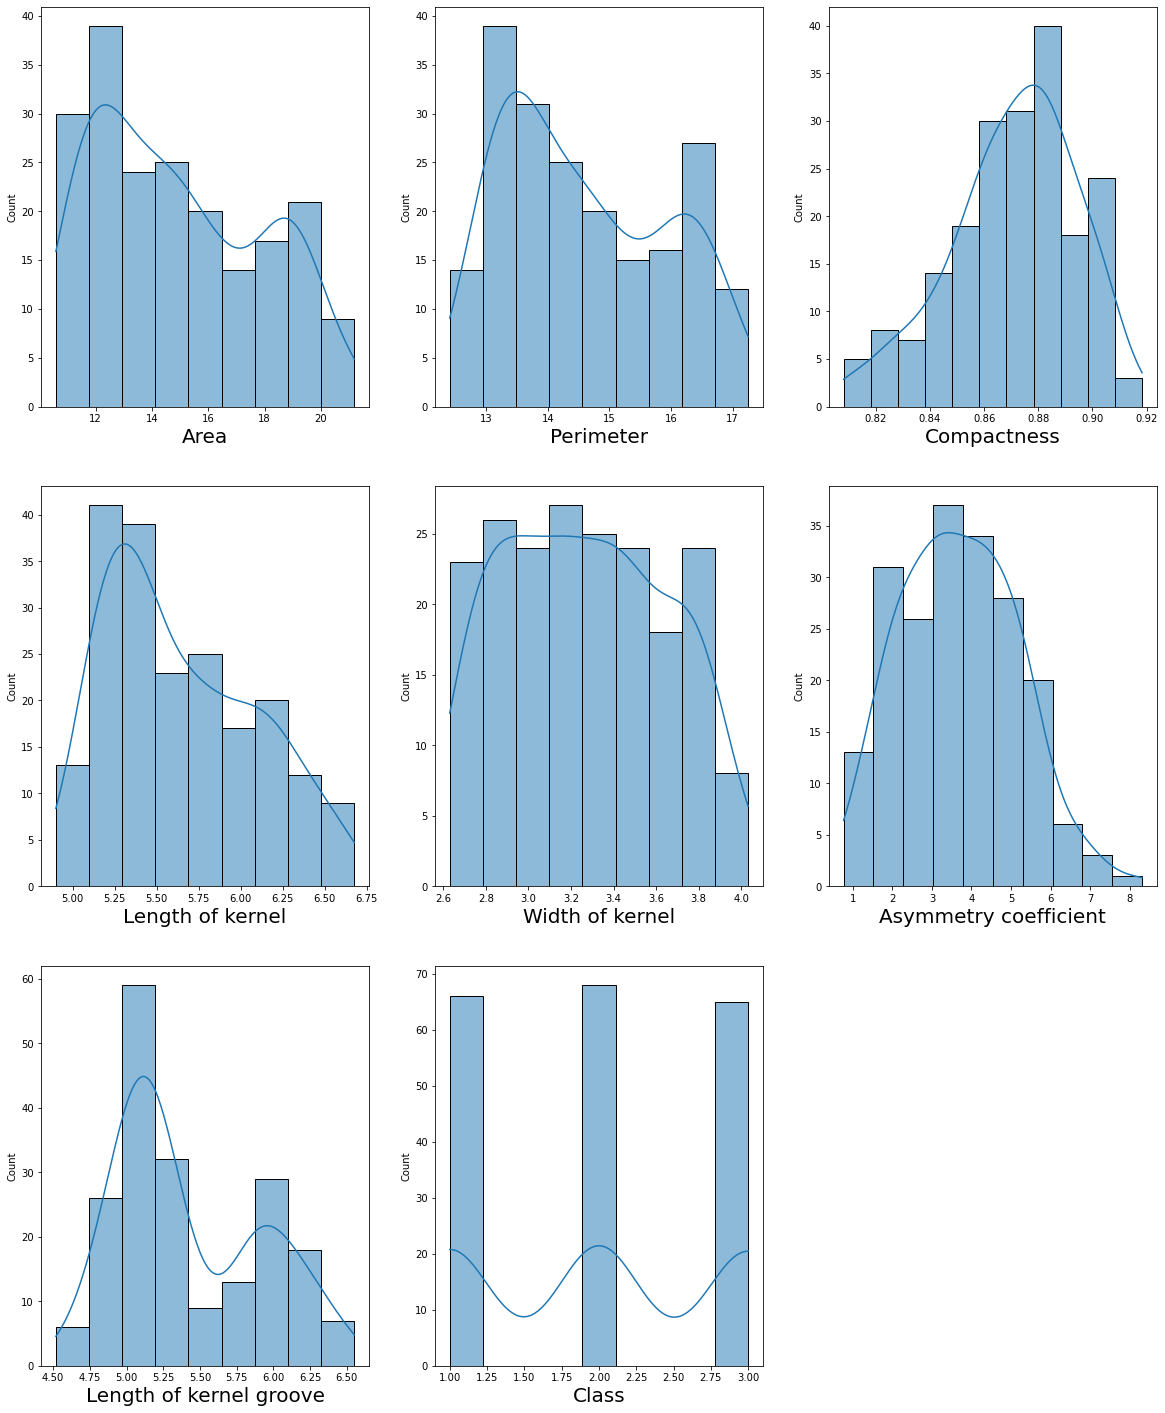

In [6]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data.columns:
    if plotnumber<=8 :
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(data[column],kde = True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Observation :-
    
As our dataset is nearly gaussian data(normal data).

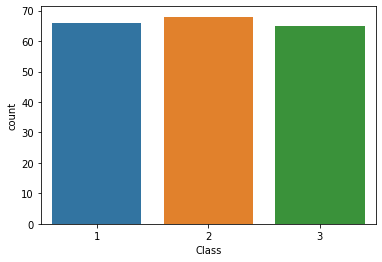

In [7]:
## distribution of output feature
sns.countplot(x = "Class",data = data)

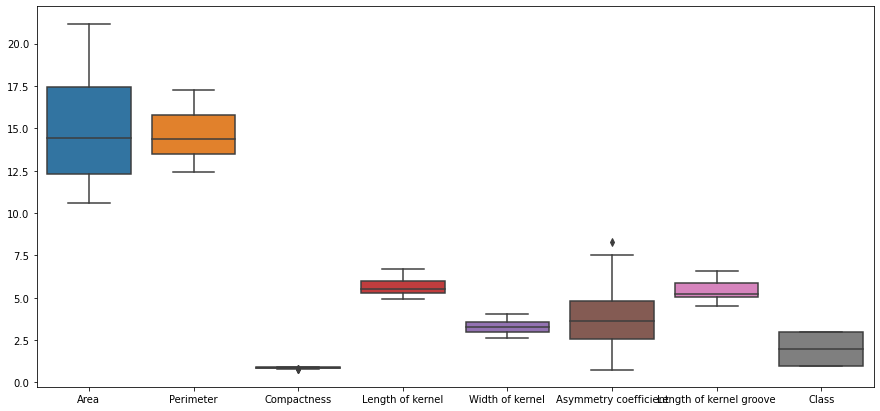

In [8]:
## boxplot
plt.figure(figsize = (15,7))
sns.boxplot(data = data)
plt.show()

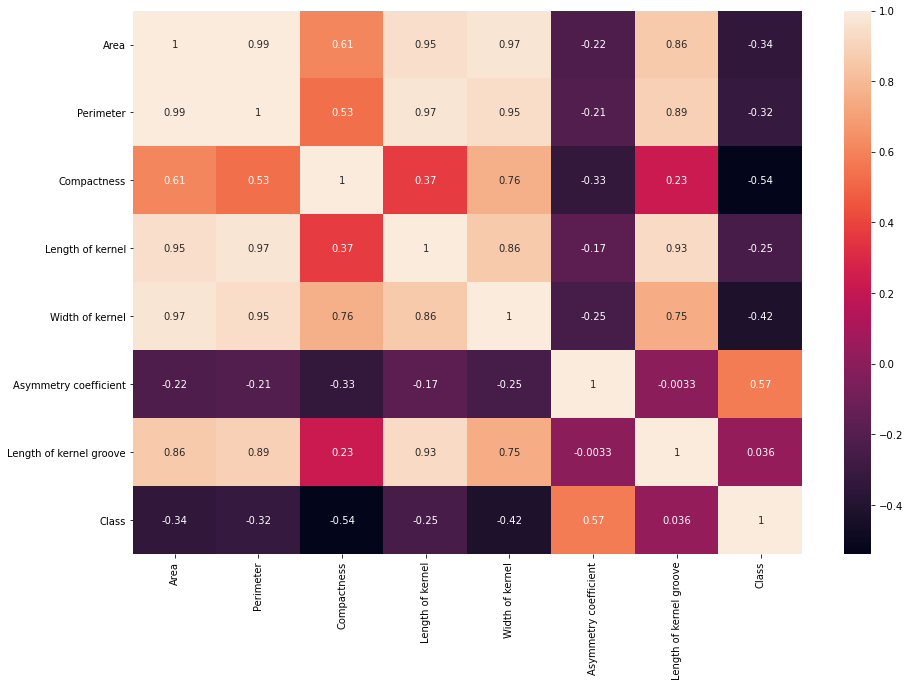

In [9]:
## Correlation map
plt.figure(figsize=(15,10), facecolor='white')
sns.heatmap(data.corr(), annot=True)

Observation :-
    
As features are highly Correlated with each other therefore Multi collinearity Exist.

Multi collinearity is a condition when two or more variables carry almost the same information.This condition will allow the model to be baised towards a variable.On the other hand Naive bayes algorithm uses the bayes theorm of probability.it assumes that the presence of one feature does not affect the presence or absence of other feature no matter upto which extent the features are interrelated.So,multi collinearity does not affect the Naive Bayes.

Note :-
    
1) For Naive Bayes algorithm , their is no need to standarization of dataset.

2) Naive Bayes Algorithm works well on Gaussian Data.

### Splitting dataset into train and test dataset

In [10]:
X = data.drop(columns = ['Class'])
y = data['Class']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state = 355)

In [12]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((149, 7), (50, 7), (149,), (50,))

### Implement Naive Bayes Algorithm 

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [14]:
model.fit(x_train,y_train)

GaussianNB()

In [15]:
model.score(x_train,y_train)

0.9261744966442953

In [16]:
model.score(x_test,y_test)

0.88

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [19]:
print(accuracy_score(y_test, y_pred))

0.88


In [20]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[16,  0,  4],
       [ 2, 16,  0],
       [ 0,  0, 12]], dtype=int64)

<Figure size 504x504 with 0 Axes>

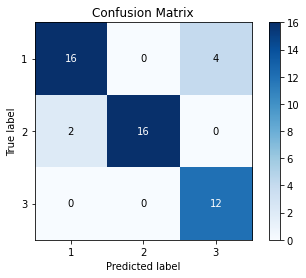

In [21]:
## plot confusion_matrix 
import scikitplot
plt.figure(figsize = (7,7))
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.89      0.80      0.84        20
           2       1.00      0.89      0.94        18
           3       0.75      1.00      0.86        12

    accuracy                           0.88        50
   macro avg       0.88      0.90      0.88        50
weighted avg       0.90      0.88      0.88        50



**Advantages:**

* Naive Bayes is extremely fast for both training and prediction as they not have to learn to create separate classes.
* Naive Bayes provides a direct probabilistic prediction.
* Naive Bayes is often easy to interpret.
* Naive Bayes has fewer (if any) parameters to tune


**Disadvantages:**

* The algorithm assumes that the features are independent which is not always the scenario
* Zero Frequency i.e. if the category of any categorical variable is not seen in training data set even once then model assigns a zero probability to that category and then a prediction cannot be made.

